In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from gensim import downloader as gensim_down

In [50]:
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

### Word2Vec with CBOW or Skip-gram (2 pts): 
Implement a Word2Vec pre-trained embedding approach to create embeddings of the TweetsCOV19 dataset. Motivate your choice between CBOW or Skip-gram. Explain the methodology and provide a code snippet of the function used to produce these embeddings.

#### Helpfull

https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314#:~:text=Continuous%20Bag%20of%20Words%20Model%20(CBOW)%20and%20Skip%2Dgram&text=In%20the%20CBOW%20model%2C%20the,used%20to%20predict%20the%20context%20

https://medium.com/@martinpella/how-to-use-pre-trained-word-embeddings-in-pytorch-71ca59249f76


In [51]:
# loading data with preprocessed tweets
data = pd.read_csv('data/cleaned_tweets.csv')

Get all different words from the tweets (with their respectiv frequencies)

In [55]:
# get all different words and frequencies
def single_words(data):

    tweets = data['TweetText'].tolist()
    words = []
    for sentence in tweets:
        words.append(sentence.split())

    words = [item for sublist in words for item in sublist]

    freqs = dict()
    for s in words:
        if s in freqs:
            freqs[s] += 1
        else:
            freqs[s] = 1

    return freqs

words_freqs = single_words(data)

In [58]:
print(f'We have {len(words_freqs)} different words in the dataset.')

We have 596500 different words in the dataset.


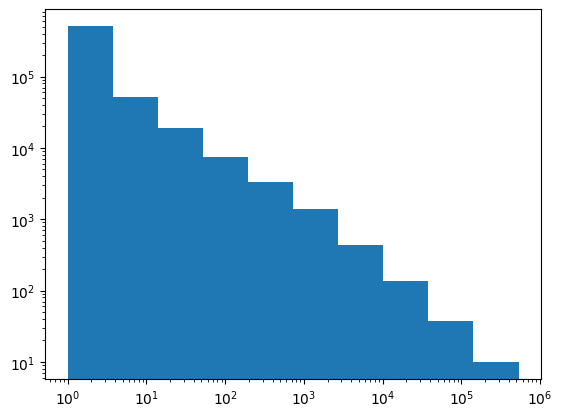

In [62]:
def plot_loghist(x, bins):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins)
    plt.xscale('log')
    plt.yscale('log')

plot_loghist(list(words_freqs.values()), 10)

### Downloading the pre-trained embedding with CBOW

In [63]:
CBOW_vectors = gensim_down.load('word2vec-google-news-300')

In [72]:
def word2vec(words_freqs, n=1):
    w2v = dict()
    count_in = 0
    count_out = 0
    count = 0
    for key, val in words_freqs.items():
        if val >= n:
            count += 1
            try:
                emb = CBOW_vectors[key]
                count_in += 1
                w2v[key] = emb
            except:
                emb = np.zeros((300,))
                w2v[key] = emb
                count_out += 1
    
    print(f'We only transfomred words that are at least {n}-times in the dataset.\n'
          f'Words overall: {count} (with {n} appearance)\n'
          f'There are {count_in} that could be transformed and {count_out} that couldn´t.\n'
          f'Words that couldn´t be transformed are mapped to the all zero vector.')
    
    return w2v
    
w2v = word2vec(words_freqs,5)

We only transfomred words that are at least 5-times in the dataset.
Words overall: 68559 (with 5 appearance)
There are 33605 that could be transformed and 34954 that couldn´t.
Words that couldn´t be transformed are mapped to the all zero vector.
